## Nikhil Lamba
## 21901305

In [ ]:
%cd D:\Satbir_Sir_dataset\Nikhil_codes

D:\Satbir_Sir_dataset\Nikhil_codes


In [ ]:
import cv2
import sys


(major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')

if __name__ == '__main__' :

    # Set up tracker.
    # Instead of CSRT, you can also use

    tracker_types = ['BOOSTING', 'MIL','KCF', 'TLD', 'MEDIANFLOW', 'GOTURN', 'MOSSE', 'CSRT']
    tracker_type = tracker_types[7]

    if int(minor_ver) < 3:
        tracker = cv2.Tracker_create(tracker_type)
    else:
        if tracker_type == 'BOOSTING':
            tracker = cv2.legacy.TrackerBoosting_create()
        elif tracker_type == 'MIL':
            tracker = cv2.TrackerMIL_create()
        elif tracker_type == 'KCF':
            tracker = cv2.legacy.TrackerKCF_create()
        elif tracker_type == 'TLD':
            tracker = cv2.legacy.TrackerTLD_create()
        elif tracker_type == 'MEDIANFLOW':
            tracker = cv2.legacy.TrackerMedianFlow_create()
        elif tracker_type == 'GOTURN':
             tracker = cv2.TrackerGOTURN_create()
        elif tracker_type == 'MOSSE':
            tracker = cv2.legacy.TrackerMOSSE_create()
        elif tracker_type == "CSRT":
            tracker = cv2.TrackerCSRT_create()


video = cv2.VideoCapture("projected_yolov5_deepsort_original.avi")
out = cv2.VideoWriter('CSRT.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 25, (352,288))
#video = cv2.VideoCapture(0) # for using CAM

# Exit if video not opened.
if not video.isOpened():
  print("Could not open video")
  sys.exit()

# Read first frame.
ok, frame = video.read()
if not ok:
  print ('Cannot read video file')
  sys.exit()

bbox = (213,121,21,95)

# Uncomment the line below to select a different bounding box
####bbox = cv2.selectROI(frame, False)

# Initialize tracker with first frame and bounding box
ok = tracker.init(frame, bbox)
list1=[]
list2=[]
bbox_0=[]
bbox_1=[]
bbox_2=[]
bbox_3=[]
while True:
     # Read a new frame
     ok, frame = video.read()
     if not ok:
         break

     # Start timer
     timer = cv2.getTickCount()

     # Update tracker
     ok, bbox = tracker.update(frame)

     # Calculate Frames per second (FPS)
     fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer);

     # Draw bounding box
     if ok:
         # Tracking success
         p1 = (int(bbox[0]), int(bbox[1]))
         p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
         print(p1,p2)
         list1.append(p1)
         list2.append(p2)
         bbox_0.append(bbox[0])
         bbox_1.append(bbox[1])
         bbox_2.append(bbox[0]+bbox[2])
         bbox_3.append(bbox[1]+bbox[3])
         cv2.rectangle(frame, p1, p2, (255,0,0), 2, 1)
     else :
         # Tracking failure
         cv2.putText(frame, "Tracking failure detected", (100,80), cv2.FONT_HERSHEY_SIMPLEX, 0.75,(0,0,255),2)

     # # Display tracker type on frame
     # cv2.putText(frame, tracker_type + " Tracker", (100,20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (50,170,50),2);
     #
     # # Display FPS on frame
     # cv2.putText(frame, "FPS : " + str(int(fps)), (100,50), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (50,170,50), 2);
     # # Display result
     imS = cv2.resize(frame, (352,288))                    # Resize image
     out.write(frame)
     cv2.imshow("Tracking", imS)

     # Exit if ESC pressed
     if cv2.waitKey(1) & 0xFF == ord('q'): # if press SPACE bar
         break

video.release()
out.release()
cv2.destroyAllWindows()


(211, 120) (232, 215)
(210, 119) (231, 212)
(207, 118) (228, 211)
(207, 116) (228, 211)
(206, 115) (227, 210)
(207, 114) (228, 209)
(207, 113) (228, 206)
(208, 111) (229, 206)
(209, 109) (230, 206)
(210, 107) (232, 206)
(214, 107) (236, 206)
(217, 107) (238, 204)
(219, 108) (241, 207)
(218, 110) (239, 205)
(217, 111) (238, 204)
(215, 110) (236, 205)
(215, 109) (236, 204)
(214, 108) (235, 201)
(213, 107) (234, 200)
(214, 105) (235, 200)
(215, 104) (236, 201)
(215, 102) (237, 201)
(215, 101) (238, 204)
(217, 100) (240, 205)
(217, 101) (240, 204)
(218, 102) (240, 203)
(217, 100) (240, 203)
(217, 99) (240, 204)
(217, 98) (240, 201)
(217, 97) (239, 196)
(219, 96) (241, 197)
(221, 96) (243, 197)
(222, 96) (245, 199)
(223, 96) (246, 199)
(223, 97) (245, 196)
(223, 98) (244, 195)
(223, 98) (244, 193)
(222, 98) (243, 195)
(223, 98) (244, 193)
(223, 99) (244, 192)
(222, 102) (243, 195)
(222, 104) (243, 197)
(224, 106) (245, 201)
(224, 108) (246, 207)
(223, 109) (245, 208)
(223, 110) (244, 207)
(

In [ ]:
#dataframe containing values regarding tracker_MIL_RGB
import pandas as pd
#from pandas import DataFrame
df_MIL_RGB = pd.DataFrame(list(zip(bbox_0,bbox_1,bbox_2,bbox_3)), columns =['bbox_0', 'bbox_1','bbox_2','bbox_3']) 
#print(df_MIL_RGB) 
# df=DataFrame({'bbox0' : bbox_0, 'bbox1': bbox_1, 'bbox2': bbox_2, 'bbox3': bbox_3})

# print(df)

In [ ]:
df_MIL_RGB

,bbox_0,bbox_1,bbox_2,bbox_3
0,211,120,232,215
1,210,119,231,212
2,207,118,228,211
3,207,116,228,211
4,206,115,227,210
...,...,...,...,...
591,201,102,221,193
592,196,106,216,197
593,194,107,214,198
594,194,111,214,201


In [ ]:
df_GT__pre=pd.read_csv('groundtruth_rect.txt',sep="	",header=None)

In [ ]:
#df_GT=df_GT__pre.iloc[:,[1,2,3,4]]

In [ ]:
df_GT=df_GT__pre

In [ ]:
df_GT[2]=df_GT[0]+df_GT[2]
df_GT[3]=df_GT[1]+df_GT[3]

In [ ]:
df_GT

,0,1,2,3
0,213,121,234,216
1,213,119,234,214
2,211,119,232,214
3,210,116,231,211
4,209,115,230,210
...,...,...,...,...
592,192,71,231,235
593,189,76,226,240
594,186,83,219,237
595,185,87,221,240


In [ ]:
dfGTMIL_list = df_GT.to_numpy().tolist()
dfMILRGB_list=df_MIL_RGB.to_numpy().tolist()
dfGTMIL_list

[[213, 121, 234, 216],
 [213, 119, 234, 214],
 [211, 119, 232, 214],
 [210, 116, 231, 211],
 [209, 115, 230, 210],
 [209, 115, 230, 210],
 [208, 114, 229, 209],
 [208, 111, 229, 206],
 [208, 111, 229, 206],
 [210, 109, 231, 205],
 [211, 108, 232, 204],
 [214, 108, 235, 204],
 [219, 108, 240, 204],
 [219, 108, 240, 204],
 [219, 108, 240, 204],
 [219, 108, 240, 204],
 [219, 108, 240, 204],
 [217, 108, 238, 204],
 [217, 108, 238, 204],
 [215, 105, 236, 201],
 [215, 105, 236, 201],
 [215, 103, 236, 199],
 [215, 103, 236, 199],
 [215, 102, 236, 198],
 [217, 102, 238, 198],
 [219, 102, 240, 198],
 [219, 102, 240, 198],
 [219, 102, 240, 198],
 [220, 99, 241, 195],
 [220, 99, 241, 195],
 [220, 96, 241, 192],
 [220, 96, 241, 192],
 [220, 96, 241, 192],
 [220, 96, 241, 192],
 [223, 97, 244, 193],
 [223, 97, 244, 193],
 [223, 97, 244, 193],
 [223, 97, 244, 193],
 [223, 97, 244, 193],
 [225, 97, 246, 193],
 [225, 97, 246, 193],
 [225, 100, 246, 196],
 [225, 102, 246, 198],
 [225, 104, 246, 200],
 

## Metrics started here

In [ ]:
import math
rste_RGB_MIL=[]
for i in range(0,594):
    rootsquare=math.sqrt(((dfGTMIL_list[i][0]-dfMILRGB_list[i][0])**2)+((dfGTMIL_list[i][1]-dfMILRGB_list[i][1])**2))
    rste_RGB_MIL.append(rootsquare)

In [ ]:
## code for complete IOU
import cv2
def IOU(box1, box2):
    """ assumption:
         box1 = [x1,y1,x2,y2], and box2 = [x3,y3,x4,y4],
        (x1,y1) and (x3,y3) represent the top left coordinate,
        and (x2,y2) and (x4,y4) represent the bottom right coordinate """
    x1, y1, x2, y2 = box1
    x3, y3, x4, y4 = box2
    x_inter1 = max(x1, x3)
    y_inter1 = max(y1, y3)
    x_inter2 = min(x2, x4)
    y_inter2 = min(y2, y4)
    width_inter = abs(x_inter2 - x_inter1)
    height_inter = abs(y_inter2 - y_inter1)
    area_inter = width_inter * height_inter
    width_box1 = abs(x2 - x1)
    height_box1 = abs(y2 - y1)
    width_box2 = abs(x4 - x3)
    height_box2 = abs(y4 - y3)
    area_box1 = width_box1 * height_box1
    area_box2 = width_box2 * height_box2
    area_union = area_box1 + area_box2 - area_inter
    iou = area_inter / area_union
    return iou

In [ ]:
IOU_MIL_RGB=[]
for m in range(0,594):
    iou=IOU(dfGTMIL_list[m],dfMILRGB_list[m])
    IOU_MIL_RGB.append(iou)

In [ ]:
def PRC(box1, box2):
    """ assumption:
         box1 = [x1,y1,x2,y2], and box2 = [x3,y3,x4,y4],
        (x1,y1) and (x3,y3) represent the top left coordinate,
        and (x2,y2) and (x4,y4) represent the bottom right coordinate """
    x1, y1, x2, y2 = box1
    x3, y3, x4, y4 = box2
    x_inter1 = max(x1, x3)
    y_inter1 = max(y1, y3)
    x_inter2 = min(x2, x4)
    y_inter2 = min(y2, y4)
    width_inter = abs(x_inter2 - x_inter1)
    height_inter = abs(y_inter2 - y_inter1)
    area_inter = width_inter * height_inter
    width_box1 = abs(x2 - x1)
    height_box1 = abs(y2 - y1)
    width_box2 = abs(x4 - x3)
    height_box2 = abs(y4 - y3)
    area_box1 = width_box1 * height_box1
    area_box2 = width_box2 * height_box2
    if area_box2==0:
        prec=0
    else:
        prec=area_inter/area_box2
    #area_union = area_box1 + area_box2 - area_inter
    #iou = area_inter / area_union
    return prec

In [ ]:
def REC(box1, box2):
    """ assumption:
         box1 = [x1,y1,x2,y2], and box2 = [x3,y3,x4,y4],
        (x1,y1) and (x3,y3) represent the top left coordinate,
        and (x2,y2) and (x4,y4) represent the bottom right coordinate """
    x1, y1, x2, y2 = box1
    x3, y3, x4, y4 = box2
    x_inter1 = max(x1, x3)
    y_inter1 = max(y1, y3)
    x_inter2 = min(x2, x4)
    y_inter2 = min(y2, y4)
    width_inter = abs(x_inter2 - x_inter1)
    height_inter = abs(y_inter2 - y_inter1)
    area_inter = width_inter * height_inter
    width_box1 = abs(x2 - x1)
    height_box1 = abs(y2 - y1)
    width_box2 = abs(x4 - x3)
    height_box2 = abs(y4 - y3)
    area_box1 = width_box1 * height_box1
    area_box2 = width_box2 * height_box2
    rec=area_inter/area_box1
    #area_union = area_box1 + area_box2 - area_inter
    #iou = area_inter / area_union
    return rec

In [ ]:
PREC_MIL_RGB=[]
for m in range(0,594):
    prc=PRC(dfGTMIL_list[m],dfMILRGB_list[m])
    PREC_MIL_RGB.append(iou)

In [ ]:
REC_MIL_RGB=[]
for m in range(0,594):
    reca=REC(dfGTMIL_list[m],dfMILRGB_list[m])
    REC_MIL_RGB.append(reca)

In [ ]:
def FMEA(prci, reca):
    fmeas=((2*prci*reca)/(prci+reca))
    return fmeas

In [ ]:
## f-measure
FMEAS_MIL_RGB=[]    
for m in range(0,594):
    fmeas=FMEA(PREC_MIL_RGB[m],REC_MIL_RGB[m])
    FMEAS_MIL_RGB.append(fmeas)

In [ ]:
AVG_PREC_MIL_RGB=sum(PREC_MIL_RGB)/len(rste_RGB_MIL)   #Avg precision MIL RGB
AVG_REC_MIL_RGB=sum(REC_MIL_RGB)/len(rste_RGB_MIL)     #Avg recall MIL  RGB
AVG_FMEAS_MIL_RGB=sum(FMEAS_MIL_RGB)/len(rste_RGB_MIL) #Avg FMeasure MIL RGB

print("Avg Precision MIL RGB is: ", AVG_PREC_MIL_RGB)
print("Avg Recall MIL RGB is: ", AVG_REC_MIL_RGB)
print("Avg FMeasure MIL RGB is: ", AVG_FMEAS_MIL_RGB)

Avg Precision MIL RGB is:  0.7144375930257231
Avg Recall MIL RGB is:  1.8177973196699722
Avg FMeasure MIL RGB is:  0.8183439504864172


In [ ]:
AVG_PREC_BOOSTING_RGB=sum(PREC_MIL_RGB)/len(rste_RGB_MIL)   #Avg precision BOOSTING RGB
AVG_REC_BOOSTING_RGB=sum(REC_MIL_RGB)/len(rste_RGB_MIL)     #Avg recall BOOSTING  RGB
AVG_FMEAS_BOOSTING_RGB=sum(FMEAS_MIL_RGB)/len(rste_RGB_MIL) #Avg FMeasure BOOSTING RGB

print("Avg Precision BOOSTING RGB is: ", AVG_PREC_BOOSTING_RGB)
print("Avg Recall BOOSTING RGB is: ", AVG_REC_BOOSTING_RGB)
print("Avg FMeasure BOOSTING RGB is: ", AVG_FMEAS_BOOSTING_RGB)

Avg Precision BOOSTING RGB is:  -7.999131944444368
Avg Recall BOOSTING RGB is:  3.598671628902567
Avg FMeasure BOOSTING RGB is:  24.533947289483347


In [ ]:
AVG_PREC_TLD_RGB=sum(PREC_MIL_RGB)/len(rste_RGB_MIL)   #Avg precision TLD RGB
AVG_REC_TLD_RGB=sum(REC_MIL_RGB)/len(rste_RGB_MIL)     #Avg recall TLD  RGB
AVG_FMEAS_TLD_RGB=sum(FMEAS_MIL_RGB)/len(rste_RGB_MIL) #Avg FMeasure TLD RGB

print("Avg Precision TLD RGB is: ", AVG_PREC_TLD_RGB)
print("Avg Recall TLD RGB is: ", AVG_REC_TLD_RGB)
print("Avg FMeasure TLD RGB is: ", AVG_FMEAS_TLD_RGB)

Avg Precision TLD RGB is:  0.5920054610326714
Avg Recall TLD RGB is:  1.2113065503668388
Avg FMeasure TLD RGB is:  0.5838912061081837


In [ ]:
AVG_PREC_MEDIANFLOW_RGB=sum(PREC_MIL_RGB)/len(rste_RGB_MIL)   #Avg precision MEDIANFLOW RGB
AVG_REC_MEDIANFLOW_RGB=sum(REC_MIL_RGB)/len(rste_RGB_MIL)     #Avg recall MEDIANFLOW  RGB
AVG_FMEAS_MEDIANFLOW_RGB=sum(FMEAS_MIL_RGB)/len(rste_RGB_MIL) #Avg FMeasure MEDIANFLOW RGB

print("Avg Precision MEDIANFLOW RGB is: ", AVG_PREC_MEDIANFLOW_RGB)
print("Avg Recall MEDIANFLOW RGB is: ", AVG_REC_MEDIANFLOW_RGB)
print("Avg FMeasure MEDIANFLOW RGB is: ", AVG_FMEAS_MEDIANFLOW_RGB)

Avg Precision MEDIANFLOW RGB is:  -4.82919246769496
Avg Recall MEDIANFLOW RGB is:  1.2939510016487907
Avg FMeasure MEDIANFLOW RGB is:  3.8690178839668223


In [ ]:
AVG_PREC_CSRT_RGB=sum(PREC_MIL_RGB)/len(rste_RGB_MIL)   #Avg precision CSRT RGB
AVG_REC_CSRT_RGB=sum(REC_MIL_RGB)/len(rste_RGB_MIL)     #Avg recall CSRT  RGB
AVG_FMEAS_CSRT_RGB=sum(FMEAS_MIL_RGB)/len(rste_RGB_MIL) #Avg FMeasure CSRT RGB

print("Avg Precision CSRT RGB is: ", AVG_PREC_CSRT_RGB)
print("Avg Recall CSRT RGB is: ", AVG_REC_CSRT_RGB)
print("Avg FMeasure CSRT RGB is: ", AVG_FMEAS_CSRT_RGB)

Avg Precision CSRT RGB is:  0.29993408042188524
Avg Recall CSRT RGB is:  0.7767642045489426
Avg FMeasure CSRT RGB is:  0.4262634057062081


In [ ]:
data_metrics_CSRT_RGB= pd.DataFrame(list(zip(rste_RGB_MIL,IOU_MIL_RGB,PREC_MIL_RGB,REC_MIL_RGB,FMEAS_MIL_RGB)), columns =['rste_RGB_MIL', 'IOU_MIL_RGB','PREC_MIL_RGB','REC_MIL_RGB','FMEAS_MIL_RGB']) 

In [ ]:
data_metrics_MIL_RGB

,rste_RGB_MIL,IOU_MIL_RGB,PREC_MIL_RGB,REC_MIL_RGB,FMEAS_MIL_RGB
0,1.414214,0.890995,0.328774,0.942356,0.487475
1,3.162278,0.736292,0.328774,0.848120,0.473857
2,2.000000,0.826087,0.328774,0.904762,0.482292
3,2.828427,0.794872,0.328774,0.885714,0.479543
4,2.236068,0.873239,0.328774,0.932331,0.486123
...,...,...,...,...,...
589,28.284271,0.387228,0.328774,0.387228,0.355615
590,31.400637,0.368625,0.328774,0.368625,0.347561
591,26.476405,0.377841,0.328774,0.377841,0.351604
592,29.154759,0.311914,0.328774,0.311914,0.320122


In [ ]:
avg_rste_MIL_RGB=sum(data_metrics_MIL_RGB['rste_RGB_MIL'])/len(data_metrics_MIL_RGB['rste_RGB_MIL'])

In [ ]:
avg_rste_MIL_RGB

10.867834331197805

In [ ]:
data_metrics_MIL_THERMAL

,rste_RGB_MIL,IOU_MIL_RGB,PREC_MIL_RGB,REC_MIL_RGB,FMEAS_MIL_RGB
0,2.500000,0.904762,0.423476,0.950000,0.585816
1,7.660300,0.631744,0.423476,0.774318,0.547515
2,10.714486,0.277456,0.423476,0.434388,0.428863
3,3.821021,0.625441,0.423476,0.769565,0.546322
4,1.587514,0.821903,0.423476,0.902247,0.576410
...,...,...,...,...,...
145,12.759318,0.469609,0.423476,0.639094,0.509408
146,6.682829,0.656371,0.423476,0.792541,0.552002
147,12.033295,0.439739,0.423476,0.610859,0.500194
148,10.805563,0.507373,0.423476,0.673188,0.519902


In [ ]:
data_metrics_BOOSTING_RGB

,rste_RGB_MIL,IOU_MIL_RGB,PREC_MIL_RGB,REC_MIL_RGB,FMEAS_MIL_RGB
0,1.414214,0.890995,-7.999132,0.942356,2.136395
1,3.000000,0.750000,-7.999132,0.857143,1.920025
2,3.605551,0.722798,-7.999132,0.839098,1.874866
3,3.000000,0.750000,-7.999132,0.857143,1.920025
4,2.000000,0.826087,-7.999132,0.904762,2.040297
...,...,...,...,...,...
589,133.633828,-3.919526,-7.999132,1.862384,4.855161
590,136.330481,-4.244415,-7.999132,1.790466,4.613606
591,132.849539,-4.415493,-7.999132,1.781250,4.583057
592,134.350288,-16.567718,-7.999132,1.396185,3.382814


In [ ]:
avg_rste_BOOSTING_RGB=sum(data_metrics_BOOSTING_RGB['rste_RGB_MIL'])/len(data_metrics_BOOSTING_RGB['rste_RGB_MIL'])

In [ ]:
avg_rste_BOOSTING_RGB

114.1710881606646

In [ ]:
data_metrics_TLD_RGB

,rste_RGB_MIL,IOU_MIL_RGB,PREC_MIL_RGB,REC_MIL_RGB,FMEAS_MIL_RGB
0,13.038405,0.682927,0.592005,0.771930,0.670100
1,12.932336,0.670195,0.592005,0.767098,0.668273
2,14.151714,0.670050,0.592005,0.765364,0.667614
3,8.246211,0.696468,0.592005,0.780952,0.673477
4,7.615773,0.649283,0.592005,0.748872,0.661263
...,...,...,...,...,...
589,50.606324,0.099652,0.592005,0.122283,0.202697
590,54.203321,0.080935,0.592005,0.099778,0.170774
591,24.436543,0.691306,0.592005,0.824819,0.689284
592,177.890416,-2.447034,0.592005,2.166979,0.929953


In [ ]:
avg_rste_TLD_RGB=sum(data_metrics_TLD_RGB['rste_RGB_MIL'])/len(data_metrics_TLD_RGB['rste_RGB_MIL'])

In [ ]:
avg_rste_TLD_RGB

86.23716164645077

In [ ]:
data_metrics_CSRT_RGB

,rste_RGB_MIL,IOU_MIL_RGB,PREC_MIL_RGB,REC_MIL_RGB,FMEAS_MIL_RGB
0,2.236068,0.810345,0.299934,0.895238,0.449328
1,3.000000,0.736148,0.299934,0.839098,0.441909
2,4.123106,0.656040,0.299934,0.783960,0.433873
3,3.000000,0.750000,0.299934,0.857143,0.444372
4,3.000000,0.750000,0.299934,0.857143,0.444372
...,...,...,...,...,...
589,35.227830,0.353261,0.299934,0.353261,0.324421
590,38.327536,0.336290,0.299934,0.336290,0.317073
591,33.376639,0.344697,0.299934,0.344697,0.320761
592,35.227830,0.284553,0.299934,0.284553,0.292041


In [ ]:
avg_rste_CSRT_RGB=sum(data_metrics_CSRT_RGB['rste_RGB_MIL'])/len(data_metrics_CSRT_RGB['rste_RGB_MIL'])

In [ ]:
avg_rste_CSRT_RGB

5.862266033634999

## AVG F-Measure of RGB calculation

In [ ]:
AVG_FMEAS_RGB_GLOBAL=(AVG_FMEAS_MIL_RGB+AVG_FMEAS_BOOSTING_RGB+AVG_FMEAS_TLD_RGB+AVG_FMEAS_CSRT_RGB)/5
print("Avg F-measure RGB of all the trackers: ",AVG_FMEAS_RGB_GLOBAL)

Avg F-measure RGB of all the trackers:  5.272489170356832


## Calculation for Robustness

In [ ]:
print(avg_rste_MIL_RGB,"\n")
print(avg_rste_BOOSTING_RGB,"\n")
print(avg_rste_TLD_RGB,"\n")
print(avg_rste_CSRT_RGB)

10.867834331197805 

114.1710881606646 

86.23716164645077 

5.862266033634999


In [ ]:
avg_rste_rgb=[]
avg_rste_rgb.append(avg_rste_MIL_RGB)
avg_rste_rgb.append(avg_rste_BOOSTING_RGB)
avg_rste_rgb.append(avg_rste_TLD_RGB)
avg_rste_rgb.append(avg_rste_CSRT_RGB)

In [ ]:
avg_rste_rgb

[10.867834331197805, 114.1710881606646, 86.23716164645077, 5.862266033634999]

In [ ]:
#for rgb
forten=0
fortwenty=0
forthirty=0
forforty=0
forfifty=0
forsixty=0
forseventy=0
foreighty=0
forninety=0
forhundred=0
forhundredten=0
forhundredtwenty=0

for i in range(0,len(avg_rste_rgb)):
    if avg_rste_rgb[i]<10:
            forten=forten+1
for i in range(0,len(avg_rste_rgb)):
    if avg_rste_rgb[i]<20:
            fortwenty=fortwenty+1
for i in range(0,len(avg_rste_rgb)):
    if avg_rste_rgb[i]<30:
            forthirty=forthirty+1
for i in range(0,len(avg_rste_rgb)):
    if avg_rste_rgb[i]<40:
            forforty=forforty+1
for i in range(0,len(avg_rste_rgb)):
    if avg_rste_rgb[i]<50:
            forfifty=forfifty+1
for i in range(0,len(avg_rste_rgb)):
    if avg_rste_rgb[i]<60:
            forsixty=forsixty+1
for i in range(0,len(avg_rste_rgb)):
    if avg_rste_rgb[i]<70:
            forseventy=forseventy+1
for i in range(0,len(avg_rste_rgb)):
    if avg_rste_rgb[i]<80:
            foreighty=foreighty+1
for i in range(0,len(avg_rste_rgb)):
    if avg_rste_rgb[i]<90:
            forninety=forninety+1
for i in range(0,len(avg_rste_rgb)):
    if avg_rste_rgb[i]<100:
            forhundred=forhundred+1
for i in range(0,len(avg_rste_rgb)):
    if avg_rste_rgb[i]<110:
            forhundredten=forhundredten+1
for i in range(0,len(avg_rste_rgb)):
    if avg_rste_rgb[i]<120:
            forhundredtwenty=forhundredtwenty+1

In [ ]:
#for THERMAL
fortena=fortena/len(avg_rste_thermal)
fortwentya=fortwentya/len(avg_rste_thermal)
forthirtya=forthirtya/len(avg_rste_thermal)
forfortya=forfortya/len(avg_rste_thermal)
forfiftya=forfiftya/len(avg_rste_thermal)
forsixtya=forsixtya/len(avg_rste_thermal)
forseventya=forseventya/len(avg_rste_thermal)
foreightya=foreightya/len(avg_rste_thermal)
forninetya=forninetya/len(avg_rste_thermal)
forhundreda=forhundreda/len(avg_rste_thermal)
forhundredtena=forhundredtena/len(avg_rste_thermal)
forhundredtwentya=forhundredtwentya/len(avg_rste_thermal)

In [ ]:
#for RGB
forten=forten/len(avg_rste_rgb)
fortwenty=fortwenty/len(avg_rste_rgb)
forthirty=forthirty/len(avg_rste_rgb)
forforty=forforty/len(avg_rste_rgb)
forfifty=forfifty/len(avg_rste_rgb)
forsixty=forsixty/len(avg_rste_rgb)
forseventy=forseventy/len(avg_rste_rgb)
foreighty=foreighty/len(avg_rste_rgb)
forninety=forninety/len(avg_rste_rgb)
forhundred=forhundred/len(avg_rste_rgb)
forhundredten=forhundredten/len(avg_rste_rgb)
forhundredtwenty=forhundredtwenty/len(avg_rste_rgb)

In [ ]:
#for RGB
print('\nfor forten:\t',forten,'\nfor twenty:\t', fortwenty,'\nfor thirty:\t', forthirty,'\nfor forty:\t', forforty,'\nfor fifty:\t', forfifty,'\nfor forsixty:\t', forsixty,'\nfor seventy:\t', forseventy,'\nfor eighty:\t', foreighty,'\nfor ninety:\t', forninety,'\nfor hundred:\t', forhundred,'\nfor hundredten:\t', forhundredten,'\nfor hundredtwenty:\t', forhundredtwenty)


for forten:	 0.25 
for twenty:	 0.5 
for thirty:	 0.5 
for forty:	 0.5 
for fifty:	 0.5 
for forsixty:	 0.5 
for seventy:	 0.5 
for eighty:	 0.5 
for ninety:	 0.75 
for hundred:	 0.75 
for hundredten:	 0.75 
for hundredtwenty:	 1.0


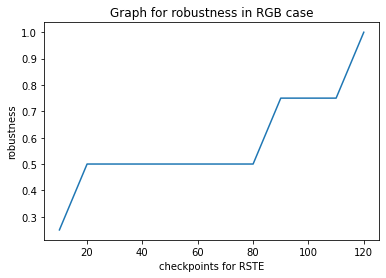

In [ ]:
import matplotlib.pyplot as plt 

x = [10,20,30,40,50,60,70,80,90,100,110,120] 

y = [0.25,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.75,0.75,0.75,1] 
 
plt.plot(x, y) 

plt.xlabel('checkpoints for RSTE') 

plt.ylabel('robustness') 

plt.title('Graph for robustness in RGB case') 

plt.show()

## KCF tracker provides tracking error , even after use of legacy

## Tracking error in case of MEDIANFLOW

## GOTurn is not working in this version of cv2 even after legacy implementation it's not working

## MOSSE tracker provides tracking error in case of rgb and thermal both, even after use of legacy

In [ ]:
## on yolov5 and deepsort

In [ ]:
## for the ease from above code the upcoming parameters are written as in MIL RGB instead of yolov5_deepsort, but values
## it contains is as per yolov5 deepsort only

In [ ]:
%cd D:\Satbir_Sir_dataset\Internal2_Nikhil_codes\yolov5_deepsort

D:\Satbir_Sir_dataset\Internal2_Nikhil_codes\yolov5_deepsort


In [ ]:
import pandas as pd
df__GT=pd.read_csv('groundtruth_rect.txt',sep="	",header=None)

In [ ]:
df__GT=df__GT.iloc[1:596,:]

In [ ]:
df__GT # we are taking 595 rows as in the predicted txt file there are 595 rows

,0,1,2,3
1,213,119,21,95
2,211,119,21,95
3,210,116,21,95
4,209,115,21,95
5,209,115,21,95
...,...,...,...,...
591,196,69,33,160
592,192,71,39,164
593,189,76,37,164
594,186,83,33,154


In [ ]:
df__pre_deepsort=pd.read_csv('projected_yolov5_deepsort_person_only.txt',sep=" ",header=None)

In [ ]:
df_deepsort=df__pre_deepsort.iloc[:,[2,3,4,5]]

In [ ]:
df__GT[2]=df__GT[0]+df__GT[2]
df__GT[3]=df__GT[1]+df__GT[3]

In [ ]:
df_deepsort[4]=df_deepsort[2]+df_deepsort[4]
df_deepsort[5]=df_deepsort[3]+df_deepsort[5]

C:\Users\Acer\AppData\Local\Temp/ipykernel_9804/846193406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deepsort[4]=df_deepsort[2]+df_deepsort[4]
C:\Users\Acer\AppData\Local\Temp/ipykernel_9804/846193406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deepsort[5]=df_deepsort[3]+df_deepsort[5]


In [ ]:
df_deepsort

,2,3,4,5
0,181,113,241,217
1,179,113,241,215
2,180,112,243,214
3,183,111,242,213
4,186,110,241,211
...,...,...,...,...
590,185,86,241,241
591,182,100,232,242
592,178,94,228,244
593,176,106,230,247


In [ ]:
dfGTMIL_list = df__GT.to_numpy().tolist()
dfMILRGB_list=df_deepsort.to_numpy().tolist()

In [ ]:
## Metrics started here

In [ ]:
import math
rste_RGB_MIL=[]
for i in range(0,594):
    rootsquare=math.sqrt(((dfGTMIL_list[i][0]-dfMILRGB_list[i][0])**2)+((dfGTMIL_list[i][1]-dfMILRGB_list[i][1])**2))
    rste_RGB_MIL.append(rootsquare)

In [ ]:
rste_RGB_MIL

[32.55764119219941,
 32.55764119219941,
 30.265491900843113,
 26.30589287593181,
 23.53720459187964,
 17.72004514666935,
 13.601470508735444,
 9.433981132056603,
 8.94427190999916,
 11.704699910719626,
 19.4164878389476,
 28.160255680657446,
 29.274562336608895,
 30.14962686336267,
 29.154759474226502,
 28.284271247461902,
 21.37755832643195,
 18.681541692269406,
 12.649110640673518,
 9.219544457292887,
 7.211102550927978,
 14.866068747318506,
 19.6468827043885,
 26.30589287593181,
 26.30589287593181,
 26.476404589747453,
 25.709920264364882,
 22.360679774997898,
 17.72004514666935,
 13.341664064126334,
 9.848857801796104,
 8.246211251235321,
 8.246211251235321,
 16.278820596099706,
 22.090722034374522,
 26.1725046566048,
 26.1725046566048,
 24.186773244895647,
 21.213203435596427,
 19.0,
 16.0312195418814,
 12.041594578792296,
 6.0,
 8.06225774829855,
 15.132745950421556,
 22.02271554554524,
 27.073972741361768,
 30.066592756745816,
 30.01666203960727,
 28.071337695236398,
 25.1793566

In [ ]:
import cv2
def IOU(box1, box2):
    """ assumption:
         box1 = [x1,y1,x2,y2], and box2 = [x3,y3,x4,y4],
        (x1,y1) and (x3,y3) represent the top left coordinate,
        and (x2,y2) and (x4,y4) represent the bottom right coordinate """
    x1, y1, x2, y2 = box1
    x3, y3, x4, y4 = box2
    x_inter1 = max(x1, x3)
    y_inter1 = max(y1, y3)
    x_inter2 = min(x2, x4)
    y_inter2 = min(y2, y4)
    width_inter = abs(x_inter2 - x_inter1)
    height_inter = abs(y_inter2 - y_inter1)
    area_inter = width_inter * height_inter
    width_box1 = abs(x2 - x1)
    height_box1 = abs(y2 - y1)
    width_box2 = abs(x4 - x3)
    height_box2 = abs(y4 - y3)
    area_box1 = width_box1 * height_box1
    area_box2 = width_box2 * height_box2
    area_union = area_box1 + area_box2 - area_inter
    iou = area_inter / area_union
    return iou

In [ ]:
IOU_MIL_RGB=[]
for m in range(0,594):
    iou=IOU(dfGTMIL_list[m],dfMILRGB_list[m])
    IOU_MIL_RGB.append(iou)

In [ ]:
IOU_MIL_RGB

[0.31971153846153844,
 0.31546489563567365,
 0.3104575163398693,
 0.33150548354935194,
 0.35913591359135916,
 0.41614518147684604,
 0.49663928304705,
 0.5869373345101501,
 0.5931156222418358,
 0.5101214574898786,
 0.4085106382978723,
 0.34285714285714286,
 0.32,
 0.31475409836065577,
 0.3047619047619048,
 0.3058252427184466,
 0.3593582887700535,
 0.4214046822742475,
 0.4876632801161103,
 0.5887850467289719,
 0.5763293310463122,
 0.4595395486665147,
 0.39622641509433965,
 0.340080971659919,
 0.33746233679276866,
 0.3240115718418515,
 0.31569057312871907,
 0.34674922600619196,
 0.3952941176470588,
 0.44483671668137686,
 0.5092194998737055,
 0.5283018867924528,
 0.5140234574196838,
 0.41869158878504675,
 0.36574746008708275,
 0.32484692233322593,
 0.3,
 0.30288461538461536,
 0.3223536936360729,
 0.36245954692556637,
 0.41243862520458263,
 0.4682926829268293,
 0.5943396226415094,
 0.5763293310463122,
 0.49065420560747663,
 0.40816326530612246,
 0.34814323607427056,
 0.32568238213399503,
 0

In [ ]:
def PRC(box1, box2):
    """ assumption:
         box1 = [x1,y1,x2,y2], and box2 = [x3,y3,x4,y4],
        (x1,y1) and (x3,y3) represent the top left coordinate,
        and (x2,y2) and (x4,y4) represent the bottom right coordinate """
    x1, y1, x2, y2 = box1
    x3, y3, x4, y4 = box2
    x_inter1 = max(x1, x3)
    y_inter1 = max(y1, y3)
    x_inter2 = min(x2, x4)
    y_inter2 = min(y2, y4)
    width_inter = abs(x_inter2 - x_inter1)
    height_inter = abs(y_inter2 - y_inter1)
    area_inter = width_inter * height_inter
    width_box1 = abs(x2 - x1)
    height_box1 = abs(y2 - y1)
    width_box2 = abs(x4 - x3)
    height_box2 = abs(y4 - y3)
    area_box1 = width_box1 * height_box1
    area_box2 = width_box2 * height_box2
    if area_box2==0:
        prec=0
    else:
        prec=area_inter/area_box2
    #area_union = area_box1 + area_box2 - area_inter
    #iou = area_inter / area_union
    return prec

In [ ]:
def REC(box1, box2):
    """ assumption:
         box1 = [x1,y1,x2,y2], and box2 = [x3,y3,x4,y4],
        (x1,y1) and (x3,y3) represent the top left coordinate,
        and (x2,y2) and (x4,y4) represent the bottom right coordinate """
    x1, y1, x2, y2 = box1
    x3, y3, x4, y4 = box2
    x_inter1 = max(x1, x3)
    y_inter1 = max(y1, y3)
    x_inter2 = min(x2, x4)
    y_inter2 = min(y2, y4)
    width_inter = abs(x_inter2 - x_inter1)
    height_inter = abs(y_inter2 - y_inter1)
    area_inter = width_inter * height_inter
    width_box1 = abs(x2 - x1)
    height_box1 = abs(y2 - y1)
    width_box2 = abs(x4 - x3)
    height_box2 = abs(y4 - y3)
    area_box1 = width_box1 * height_box1
    area_box2 = width_box2 * height_box2
    rec=area_inter/area_box1
    #area_union = area_box1 + area_box2 - area_inter
    #iou = area_inter / area_union
    return rec

In [ ]:
PREC_MIL_RGB=[]
for m in range(0,594):
    prc=PRC(dfGTMIL_list[m],dfMILRGB_list[m])
    PREC_MIL_RGB.append(iou)

In [ ]:
REC_MIL_RGB=[]
for m in range(0,594):
    reca=REC(dfGTMIL_list[m],dfMILRGB_list[m])
    REC_MIL_RGB.append(reca)

In [ ]:
REC_MIL_RGB

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.99,
 0.98,
 1.0,
 1.0,
 1.0,
 0.9901960784313726,
 0.9803921568627451,
 1.0,
 1.0,
 1.0,
 0.9801980198019802,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.99,
 0.99,
 0.9797979797979798,
 0.9896907216494846,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9574468085106383,
 0.9583333333333334,
 0.9893617021276596,
 0.96875,
 0.9494949494949495,
 0.979381443298969,
 0.9587628865979382,
 1.0,
 0.9894736842105263,
 0.9791666666666666,
 1.0,
 0.9393939393939394,
 0.9468085106382979,
 0.9368421052631579,
 0.9473684210526315,
 0.9166666666666666,
 0.9494949494949495,
 1.0,
 0.90625,
 0.8913043478260869,
 0.8791208791208791,
 0.9418604651162791,
 0.9438202247191011,
 0.9176470588235294,
 0.8863636363636364,
 0.9176470588235294,

In [ ]:
def FMEA(prci, reca):
    fmeas=((2*prci*reca)/(prci+reca))
    return fmeas

In [ ]:
## f-measure
FMEAS_MIL_RGB=[]    
for m in range(0,594):
    fmeas=FMEA(PREC_MIL_RGB[m],REC_MIL_RGB[m])
    FMEAS_MIL_RGB.append(fmeas)

In [ ]:
FMEAS_MIL_RGB

[1.7581395348837208,
 1.7581395348837208,
 1.7581395348837208,
 1.7581395348837208,
 1.7581395348837208,
 1.7581395348837208,
 1.7581395348837208,
 1.7581395348837208,
 1.7581395348837208,
 1.7581395348837208,
 1.7581395348837208,
 1.7581395348837208,
 1.7581395348837208,
 1.7581395348837208,
 1.7581395348837208,
 1.7581395348837208,
 1.7581395348837208,
 1.7581395348837208,
 1.7581395348837208,
 1.7581395348837208,
 1.7581395348837208,
 1.7581395348837208,
 1.7581395348837208,
 1.7581395348837208,
 1.7581395348837208,
 1.7581395348837208,
 1.7581395348837208,
 1.7581395348837208,
 1.7581395348837208]

In [ ]:
AVG_PREC_MIL_RGB=sum(PREC_MIL_RGB)/len(rste_RGB_MIL)   #Avg precision yolov5_deepsort RGB
AVG_REC_MIL_RGB=sum(REC_MIL_RGB)/len(rste_RGB_MIL)     #Avg recall yolov5_deepsort  RGB
AVG_FMEAS_MIL_RGB=sum(FMEAS_MIL_RGB)/len(rste_RGB_MIL) #Avg FMeasure yolov5_deepsort RGB

print("Avg Precision yolov5_deepsort RGB is: ", AVG_PREC_MIL_RGB)
print("Avg Recall yolov5_deepsort RGB is: ", AVG_REC_MIL_RGB)
print("Avg FMeasure yolov5_deepsort RGB is: ", AVG_FMEAS_MIL_RGB)

Avg Precision yolov5_deepsort RGB is:  0.5163024005732725
Avg Recall yolov5_deepsort RGB is:  0.9365727278764949
Avg FMeasure yolov5_deepsort RGB is:  0.6637729416103426


In [ ]:
data_metrics_yolov5_deepsort_RGB= pd.DataFrame(list(zip(rste_RGB_MIL,IOU_MIL_RGB,PREC_MIL_RGB,REC_MIL_RGB,FMEAS_MIL_RGB)), columns =['rste_RGB_MIL', 'IOU_MIL_RGB','PREC_MIL_RGB','REC_MIL_RGB','FMEAS_MIL_RGB']) 

In [ ]:
data_metrics_yolov5_deepsort_RGB

,rste_RGB_MIL,IOU_MIL_RGB,PREC_MIL_RGB,REC_MIL_RGB,FMEAS_MIL_RGB
0,32.557641,0.319712,0.516302,1.000000,0.681002
1,32.557641,0.315465,0.516302,1.000000,0.681002
2,30.265492,0.310458,0.516302,1.000000,0.681002
3,26.305893,0.331505,0.516302,1.000000,0.681002
4,23.537205,0.359136,0.516302,1.000000,0.681002
...,...,...,...,...,...
589,21.633308,0.490831,0.516302,0.890244,0.653565
590,20.248457,0.510659,0.516302,0.893750,0.654508
591,30.675723,0.639655,0.516302,0.823171,0.634585
592,21.095023,0.661523,0.516302,0.890244,0.653565


In [ ]:
avg_rste_yolov5_deepsort_RGB=sum(data_metrics_yolov5_deepsort_RGB['rste_RGB_MIL'])/len(data_metrics_yolov5_deepsort_RGB['rste_RGB_MIL'])

In [ ]:
avg_rste_yolov5_deepsort_RGB

11.148615599752155

## Conclusion yolov5 deepsort did well in case of tracking via detection
## In case of tracking MIL and CSRT are also performing very well, but KCF, GOTURN, MEDIANFLOW, MOSSE were providing tracking error